In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-analyst/new_Data_Analyst.csv


# 1-Data exploration and preprocessing

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.io as pio
import missingno as msno
from scipy import stats
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [3]:
# We read the dataset and know the columns
df=pd.read_csv('../input/new-analyst/new_Data_Analyst.csv')
df.sample(5)

,Job_Title,Rating,Location,Headquarters,Founded\t,ownership\t,Industry,Sector,Revenue,Competitors\t,Easy_Apply,Estimated_min_salary,Estimated_max_salary,Min_size,Max_size
434,Quality Data Analyst,2.6,"Salt Lake City, UT","Salt Lake City, UT",2005,Company - Private,Consumer Products Manufacturing,Manufacturing,$50 to $100 million (USD),Unknown,False,26,47,201.0,500.0
1037,Enterprise Data Quality Analyst - EDM,4.2,"Scottsdale, AZ","Schaumburg, IL",2014,Company - Private,Accounting,Accounting & Legal,$1 to $5 million (USD),Unknown,False,43,94,201.0,500.0
2096,Technical Data Analyst,3.3,"Redmond, WA","Waltham, MA",1996,Company - Private,IT Services,Information Technology,$500 million to $1 billion (USD),"SDL, Keywords Studios, TransPerfect",False,35,67,5001.0,10000.0
449,Sr Data Analyst,4.1,"Draper, UT","Mountain View, CA",2011,Company - Private,IT Services,Information Technology,Non-Applicable,Unknown,False,26,47,51.0,200.0
2177,TX Healthcare Data/Reporting Analyst,3.6,"Denver, CO","Mumbai, India",2005,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),"Cognizant Technology Solutions, Infosys, HCL T...",False,36,67,1001.0,5000.0


**As you see, the dataset is so messy.there are some ways to clean and sort it.One of this is SQLITE or SQL and second is clean on kaggle and I clean on sqlite.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job_Title             2253 non-null   object 
 1   Rating                2253 non-null   float64
 2   Location              2253 non-null   object 
 3   Headquarters          2253 non-null   object 
 4   Founded	              2253 non-null   int64  
 5   ownership	            2253 non-null   object 
 6   Industry              2253 non-null   object 
 7   Sector                2253 non-null   object 
 8   Revenue               2253 non-null   object 
 9   Competitors	          2253 non-null   object 
 10  Easy_Apply            2253 non-null   bool   
 11  Estimated_min_salary  2253 non-null   int64  
 12  Estimated_max_salary  2253 non-null   int64  
 13  Min_size              2249 non-null   float64
 14  Max_size              2251 non-null   float64
dtypes: bool(1), float64(3

In [5]:
#Number of the rows and columns
df.shape

(2253, 15)

In [6]:
new = df["Job_Title"].str.split(",", n = 1, expand = True) 
# making separate first name column from new data frame 
df["Job"]= new[0] 
df.drop(columns =["Job_Title"], inplace = True) 
df.head(3)

,Rating,Location,Headquarters,Founded\t,ownership\t,Industry,Sector,Revenue,Competitors\t,Easy_Apply,Estimated_min_salary,Estimated_max_salary,Min_size,Max_size,Job
0,3.2,"New York, NY","New York, NY",1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),Unknown,True,37,66,201.0,500.0,Data Analyst
1,3.8,"New York, NY","New York, NY",1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Unknown,False,37,66,1100.0,1500.0,Quality Data Analyst
2,3.4,"New York, NY","New York, NY",2003,Company - Private,Internet,Information Technology,Non-Applicable,GoDaddy,False,37,66,1001.0,5000.0,Sr Data Analyst


In [7]:
# We want to change the number of the columns
titles=list(df.columns)
titles

['Rating',
 'Location',
 'Headquarters',
 'Founded\t',
 'ownership\t',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors\t',
 'Easy_Apply',
 'Estimated_min_salary',
 'Estimated_max_salary',
 'Min_size',
 'Max_size',
 'Job']

In [8]:
titles[0],titles[1],titles[2],titles[3],titles[4],titles[5],titles[6],titles[7],titles[8],titles[9],titles[10],titles[11],titles[12],titles[13],titles[14]=titles[14],titles[10],titles[11],titles[1],titles[2],titles[0],titles[3],titles[4],titles[12],titles[13],titles[5],titles[6],titles[7],titles[8],titles[9]
df=df[titles]
df

,Job,Estimated_min_salary,Estimated_max_salary,Location,Headquarters,Rating,Founded\t,ownership\t,Min_size,Max_size,Industry,Sector,Revenue,Competitors\t,Easy_Apply
0,Data Analyst,37,66,"New York, NY","New York, NY",3.2,1961,Nonprofit Organization,201.0,500.0,Social Assistance,Non-Profit,$100 to $500 million (USD),Unknown,True
1,Quality Data Analyst,37,66,"New York, NY","New York, NY",3.8,1893,Nonprofit Organization,1100.0,1500.0,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Unknown,False
2,Sr Data Analyst,37,66,"New York, NY","New York, NY",3.4,2003,Company - Private,1001.0,5000.0,Internet,Information Technology,Non-Applicable,GoDaddy,False
3,Data Analyst,37,66,"New York, NY","McLean, VA",4.1,2002,Subsidiary or Business Segment,201.0,500.0,IT Services,Information Technology,$50 to $100 million (USD),Unknown,False
4,Reporting Data Analyst,37,66,"New York, NY","New York, NY",3.9,2009,Company - Private,501.0,1000.0,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,Radar Data Analyst,78,104,"Denver, CO","Alpharetta, GA",2.5,2011,Company - Private,51.0,200.0,Staffing & Outsourcing,Business Services,Non-Applicable,Unknown,False
2249,Sr Data Analyst,78,104,"Centennial, CO","Centennial, CO",2.9,1935,Company - Public,NaN,1500.0,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",False
2250,Technical Data Analyst,78,104,"Denver, CO",Unknown,-1.0,2011,Unknown,51.0,200.0,Unknown,Unknown,Non-Applicable,Unknown,False
2251,Data Analyst,78,104,"Centennial, CO","West Chester, OH",3.1,1984,Company - Private,201.0,500.0,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),Unknown,False


In [9]:
median=df['Min_size'].median()
df['Min_size'].fillna(median,inplace=True)
median=df['Max_size'].median()
df['Max_size'].fillna(median,inplace=True)
df.isnull().sum()

Job                     0
Estimated_min_salary    0
Estimated_max_salary    0
Location                0
Headquarters            0
Rating                  0
Founded\t               0
ownership\t             0
Min_size                0
Max_size                0
Industry                0
Sector                  0
Revenue                 0
Competitors\t           0
Easy_Apply              0
dtype: int64

**We divide the data into categorical and numerical**

In [10]:
cat_cols=df.select_dtypes(include='object')
num_cols=df.select_dtypes(exclude='object')

**This is the categorical part of the dataset which Data analys is the demanding job and with the highest salary.The most headquarters are exist in NY  and IT has the highest sector and we can say that applying is not easy in this data.**

In [11]:
cat_cols.describe()

,Job,Location,Headquarters,ownership\t,Industry,Sector,Revenue,Competitors\t
count,2253,2253,2253,2253,2253,2253,2253,2253
unique,76,253,483,14,89,25,13,291
top,Data Analyst,"New York, NY","New York, NY",Company - Private,Unknown,Information Technology,Non-Applicable,Unknown
freq,937,310,206,1273,353,570,778,1732


**This is the categorical part of the dataset which the max of the size of the company is 10000 and for estimated_max salary is 190000$ and the max of the rating is 5**

In [12]:
num_cols.describe()

,Estimated_min_salary,Estimated_max_salary,Rating,Founded\t,Min_size,Max_size
count,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000,2253.000000
mean,54.198846,89.827341,3.160630,1988.237461,634.878828,1664.957834
std,19.713522,29.349836,1.665228,43.093428,1028.084415,2429.998732
min,24.000000,38.000000,-1.000000,1682.000000,1.000000,50.000000
25%,41.000000,69.000000,3.100000,1987.000000,51.000000,200.000000
50%,50.000000,87.000000,3.600000,2004.000000,201.000000,500.000000
75%,64.000000,104.000000,4.000000,2013.000000,1001.000000,1500.000000
max,113.000000,190.000000,5.000000,2019.000000,5001.000000,10000.000000


* Divide the target with easy apply which one is easy(True) and which one is hard to apply(False)

In [13]:
target=df[df['Easy_Apply']=='True']
non_target=df[df['Easy_Apply']=='False']

/opt/conda/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)
/opt/conda/lib/python3.7/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [14]:
#we use this part for analyzing the data based on response
target_cols=['Easy_Apply']
cat_cols=df.nunique()[df.nunique()<10].keys().tolist()
cat_cols=[x for x in cat_cols if x not in target_cols]
num_col=[x for x in df.columns if x not in cat_cols+ target_cols]

**we clean the missing values and ass you see, there is no missing values and it is clean.**

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


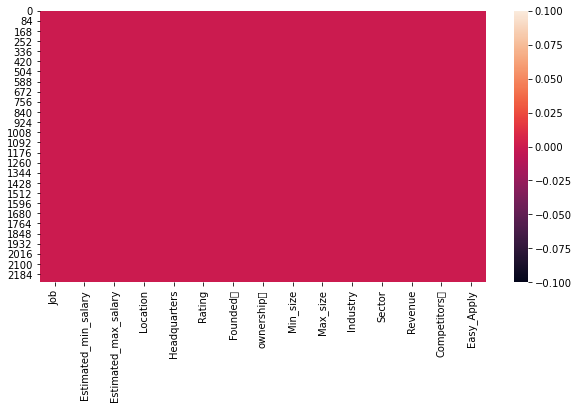

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull());

In [16]:
# New York has is the most popular city to find a job 
df['Location'].value_counts(normalize=True)*100

New York, NY           13.759432
Chicago, IL             5.770084
San Francisco, CA       5.281846
Austin, TX              3.595206
Los Angeles, CA         3.550821
                         ...    
Azusa, CA               0.044385
Fort Washington, PA     0.044385
Norristown, PA          0.044385
Sandy, UT               0.044385
Hercules, CA            0.044385
Name: Location, Length: 253, dtype: float64

In [17]:
#New York has the highest amount for finding jobs 
df['Headquarters'].value_counts(normalize=True)*100

New York, NY         9.143364
Unknown              7.634265
San Francisco, CA    3.151354
Chicago, IL          2.929427
Woodridge, IL        2.574345
                       ...   
Southlake, TX        0.044385
Moon Township, PA    0.044385
Huntsville, AL       0.044385
Nicosia, Cyprus      0.044385
Bezons, France       0.044385
Name: Headquarters, Length: 483, dtype: float64

In [18]:
# It has the most Vacancy in this dataset
df['Sector'].value_counts(normalize=True)*100

Information Technology                25.299601
Business Services                     23.257878
Unknown                               15.667998
Finance                                7.501110
Health Care                            6.702175
Education                              2.308034
Insurance                              2.263648
Accounting & Legal                     1.908566
Media                                  1.864181
Manufacturing                          1.775411
Retail                                 1.686640
Government                             1.597870
Biotech & Pharmaceuticals              1.464714
Non-Profit                             1.154017
Aerospace & Defense                    0.976476
Transportation & Logistics             0.887705
Construction, Repair & Maintenance     0.710164
Consumer Services                      0.621394
Oil, Gas, Energy & Utilities           0.577008
Real Estate                            0.532623
Telecommunications                     0

In [19]:
# As you see, most rule of the apply for jobs are not easy 
df['Easy_Apply'].value_counts(normalize=True)*100

False    96.449179
True      3.550821
Name: Easy_Apply, dtype: float64

**we want to find the first top 3 job title.**

In [20]:
# It shows that the Rating for easy apply and non easy are different and for easy apply is 3.79 and for non easy is 3.13
df.groupby ('Easy_Apply').mean().sort_values('Rating',ascending=True)

,Estimated_min_salary,Estimated_max_salary,Rating,Founded\t,Min_size,Max_size
Easy_Apply,,,,,,
False,54.080534,89.592269,3.137138,1987.742292,639.232858,1653.750575
True,57.412500,96.212500,3.798750,2001.687500,516.612500,1969.375000


In [21]:
df.groupby(['Min_size','Max_size']).mean().sort_values('Rating',ascending=True)

Estimated_min_salary  Estimated_max_salary    Rating  \
Min_size Max_size                                                         
51.0     500.0                46.000000             87.000000 -1.000000   
         200.0                54.732372             90.559295  2.354167   
1.0      50.0                 54.809798             90.501441  3.034294   
201.0    1500.0               72.750000            103.000000  3.225000   
1001.0   5000.0               54.879310             90.744253  3.496839   
201.0    500.0                53.522088             88.554217  3.611647   
5001.0   10000.0              55.639175             92.443299  3.636082   
1100.0   1500.0               51.816712             87.474394  3.637466   
501.0    1000.0               54.545024             89.255924  3.647867   

                     Founded\t  Easy_Apply  
Min_size Max_size                           
51.0     500.0     2017.000000    0.000000  
         200.0     2007.834936    0.030449  
1.0      50.0      2009.853026    0.014409  
201.0    1500.0    1923.000000    0.000000  
1001.0   5000.0    1985.925287    0.068966  
201.0    500.0     1997.899598    0.064257  
5001.0   10000.0   1974.247423    0.010309  
1100.0   1500.0    1931.094340    0.002695  
501.0    1000.0    1995.014218    0.066351

In [22]:
df.groupby('Easy_Apply')['Estimated_max_salary'].mean()

Easy_Apply
False    89.592269
True     96.212500
Name: Estimated_max_salary, dtype: float64

**As you see in the top, the estimated max salary for easy apply is 96000 and for non easy is 89**

In [23]:
df.groupby('Sector')['Min_size'].mean().sort_values(ascending=False)

Sector
Insurance                             1623.274510
Manufacturing                         1374.375000
Biotech & Pharmaceuticals             1355.303030
Media                                 1295.976190
Aerospace & Defense                   1204.954545
Education                             1137.923077
Health Care                           1024.218543
Finance                               1010.331361
Telecommunications                    1009.818182
Mining & Metals                       1001.000000
Retail                                 824.184211
Government                             720.138889
Oil, Gas, Energy & Utilities           654.692308
Transportation & Logistics             648.250000
Business Services                      561.793893
Information Technology                 558.073684
Non-Profit                             552.923077
Arts, Entertainment & Recreation       458.000000
Real Estate                            438.333333
Accounting & Legal                     318.

**this is the very important part of the sector with their minimum size which Insurannce has the highest number(1623) and travel and tourist has the lowest number(51).**

In [24]:
# We use pivot to distribute the sector and and divide into easy apply and their ratings and it shows that the range of the rating is between 3 and 4 except the Unknown sector
pd.pivot_table(df,index=['Sector','Easy_Apply'],values='Rating')

Rating
Sector                             Easy_Apply          
Accounting & Legal                 False       3.741860
Aerospace & Defense                False       3.638095
                                   True        3.800000
Arts, Entertainment & Recreation   False       4.225000
                                   True        3.233333
Biotech & Pharmaceuticals          False       3.390000
                                   True        3.400000
Business Services                  False       3.646278
                                   True        3.807407
Construction, Repair & Maintenance False       2.150000
Consumer Services                  False       3.507692
                                   True        3.800000
Education                          False       3.882353
                                   True        4.800000
Finance                            False       3.447853
                                   True        4.400000
Government                         False       3.158333
Health Care                        False       3.526712
                                   True        3.620000
Information Technology             False       3.874081
                                   True        3.838462
Insurance                          False       3.300000
                                   True        4.100000
Manufacturing                      False       3.297500
Media                              False       3.915000
                                   True        3.400000
Mining & Metals                    False       3.500000
Non-Profit                         False       3.004167
                                   True        3.200000
Oil, Gas, Energy & Utilities       False       3.476923
Real Estate                        False       3.375000
Restaurants, Bars & Food Services  False       3.137500
Retail                             False       3.186486
                                   True        3.100000
Telecommunications                 False       3.563636
Transportation & Logistics         False       3.235000
Travel & Tourism                   False       4.000000
Unknown                            False       0.596034

**in the down , we use crosstab to find out which sector has the higehst number of vacancy with easy apply and Business service and IT  sector are in demanding.**

In [25]:
df['Sector'].unique()
Sector_Easy_Apply=pd.crosstab(df['Sector'],df['Easy_Apply'])
Sector_Easy_Apply

Easy_Apply,False,True
Sector,,
Accounting & Legal,43,0
Aerospace & Defense,21,1
"Arts, Entertainment & Recreation",4,3
Biotech & Pharmaceuticals,30,3
Business Services,497,27
"Construction, Repair & Maintenance",16,0
Consumer Services,13,1
Education,51,1
Finance,163,6


**In the below, the highest number for easy apply is 5000 members **

In [26]:
df['Easy_Apply'].unique()
Easy_Apply_Size=pd.crosstab(df['Easy_Apply'],df['Max_size'])
Easy_Apply_Size

Max_size,50.0,200.0,500.0,1000.0,1500.0,5000.0,10000.0
Easy_Apply,,,,,,,
False,342,605,235,197,374,324,96
True,5,19,16,14,1,24,1


**We want to use groupby to find out the average , count and sum of the Rting based on the sector**

In [27]:
df_grouped_sum=df.groupby('Sector',as_index=False)['Estimated_min_salary'].agg('sum').rename(columns={'Estimated_min_salary':'Estimated_min_salary_Sum'})
df_grouped_cnt=df.groupby('Sector',as_index=False)['Estimated_min_salary'].agg('count').rename(columns={'Estimated_min_salary':'Estimated_min_salary_Count'})
# we want to merge these 2 lines
df_grouped_salary=df_grouped_sum.merge(df_grouped_cnt, left_on='Sector',right_on='Sector',how='inner')

#Calculate the average salary
df_grouped_salary.loc[:,' Average of min salary']=df_grouped_salary['Estimated_min_salary_Sum']/df_grouped_salary['Estimated_min_salary_Count']

# The final result
df_grouped_salary.sort_values('Estimated_min_salary_Sum',ascending=False)

,Sector,Estimated_min_salary_Sum,Estimated_min_salary_Count,Average of min salary
11,Information Technology,31274,570,54.866667
4,Business Services,28564,524,54.511450
24,Unknown,19484,353,55.195467
8,Finance,8564,169,50.674556
10,Health Care,8341,151,55.238411
12,Insurance,2800,51,54.901961
7,Education,2695,52,51.826923
0,Accounting & Legal,2520,43,58.604651
13,Manufacturing,2240,40,56.000000
14,Media,2178,42,51.857143


**This is the one of the most interesting part of the code.the max average of the min salary is for It industry and The second is the min average of the min salary is for travel agency
**

In [28]:
df_grouped_sum=df.groupby('Easy_Apply',as_index=False)['Rating'].agg('sum').rename(columns={'Rating':'Rating_Sum'})
df_grouped_cnt=df.groupby('Easy_Apply',as_index=False)['Rating'].agg('count').rename(columns={'Rating':'Rating_Count'})
# merge the line of the codes
df_grouped_average=df_grouped_sum.merge(df_grouped_cnt,left_on='Easy_Apply',right_on='Easy_Apply',how='inner')

# calculate the merge part
df_grouped_average.loc[:,'Average of the rating']=df_grouped_average['Rating_Sum']/df_grouped_average['Rating_Count']

df_grouped_average.sort_values('Rating_Sum',ascending=False)

,Easy_Apply,Rating_Sum,Rating_Count,Average of the rating
0,False,6817.0,2173,3.137138
1,True,303.9,80,3.798750


**As you see upside, the easy apply divide to false and easy one, the average of the rating for easy one is 3.79 and for non_easy is 3.13**

In [29]:
#It is necessary to establish the presence of duplicates. If they are found, delete them and check if they are all deleted.
df.duplicated().sum()

61

In [30]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()
df.head(5)

,Job,Estimated_min_salary,Estimated_max_salary,Location,Headquarters,Rating,Founded\t,ownership\t,Min_size,Max_size,Industry,Sector,Revenue,Competitors\t,Easy_Apply
0,Data Analyst,37,66,"New York, NY","New York, NY",3.2,1961,Nonprofit Organization,201.0,500.0,Social Assistance,Non-Profit,$100 to $500 million (USD),Unknown,True
1,Quality Data Analyst,37,66,"New York, NY","New York, NY",3.8,1893,Nonprofit Organization,1100.0,1500.0,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Unknown,False
2,Sr Data Analyst,37,66,"New York, NY","New York, NY",3.4,2003,Company - Private,1001.0,5000.0,Internet,Information Technology,Non-Applicable,GoDaddy,False
3,Data Analyst,37,66,"New York, NY","McLean, VA",4.1,2002,Subsidiary or Business Segment,201.0,500.0,IT Services,Information Technology,$50 to $100 million (USD),Unknown,False
4,Reporting Data Analyst,37,66,"New York, NY","New York, NY",3.9,2009,Company - Private,501.0,1000.0,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [31]:
def number_of_job(df,Job,Headquarters):
    number_list=df[(df['Job']==Job)& (df['Headquarters']== Headquarters)]
    number_list_count=number_list['Sector'].count()
    return number_list_count          

# We want to know that the Data Analyst in some main  state is so demanding.

In [32]:
# the numebr of the headquarters which exist in NY 
number_of_job(df,'Data Analyst',"New York, NY")

73

In [33]:
# We have only two vacancies in Paris
number_of_job(df,"Data Analyst","Washington, DC")

3

In [34]:
number_of_job(df,'Data Analyst','Seattle, WA')

4

In [35]:
number_of_job(df,'Data Analyst','Chicago, IL')

24

# 2- Data analysis

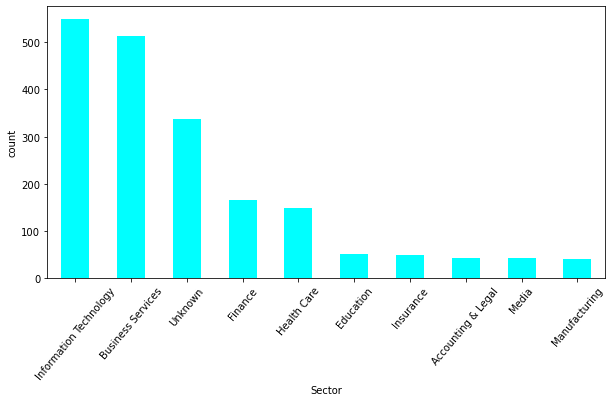

In [36]:
# It has the highest demading and sector among rest of the sectors
plt.rcParams['figure.figsize']=(10,5)
df['Sector'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='Aqua')
plt.xlabel('Sector')
plt.ylabel('count')
plt.xticks(rotation=50)
plt.show()

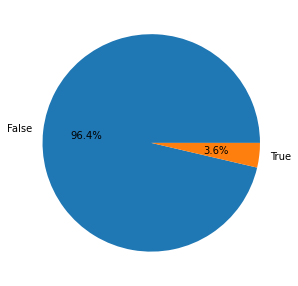

In [37]:
# As you see, the most portion of the easy apply is False and it means that is not easy to apply for findng jobs.
plt.rcParams['figure.figsize']=(10,5)
df['Easy_Apply'].value_counts().sort_values(ascending=False).plot.pie(y='Easy_Apply',autopct="%0.1f%%")
plt.axis('off')
plt.show()

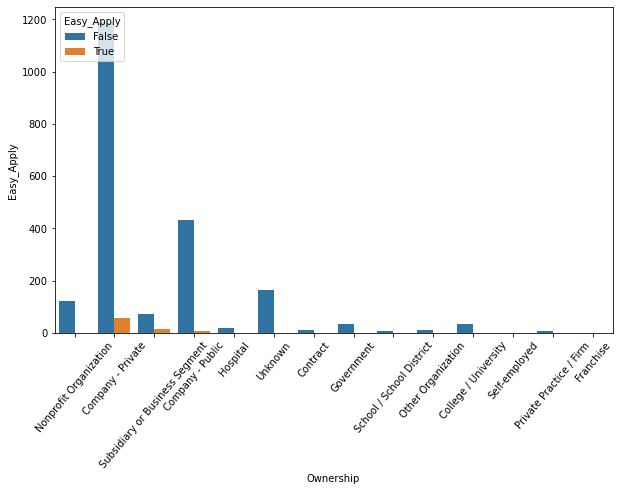

In [38]:
# in this figure, the non profit organization has the highest amount and most of these are not easy apply
fig,ax=plt.subplots(figsize=(10,6))
sns.countplot(df['ownership\t'],hue=df['Easy_Apply'],ax=ax)
plt.xlabel('Ownership')
plt.ylabel('Easy_Apply')
plt.xticks(rotation=50)
plt.show()

**In this figure, the Private companies has the highest amount and most of these are not easy apply(almost 1200 records) and the lowest one is for finance.the only sector which has the highest amount of easy apply is for private companies with almost 100 records.**

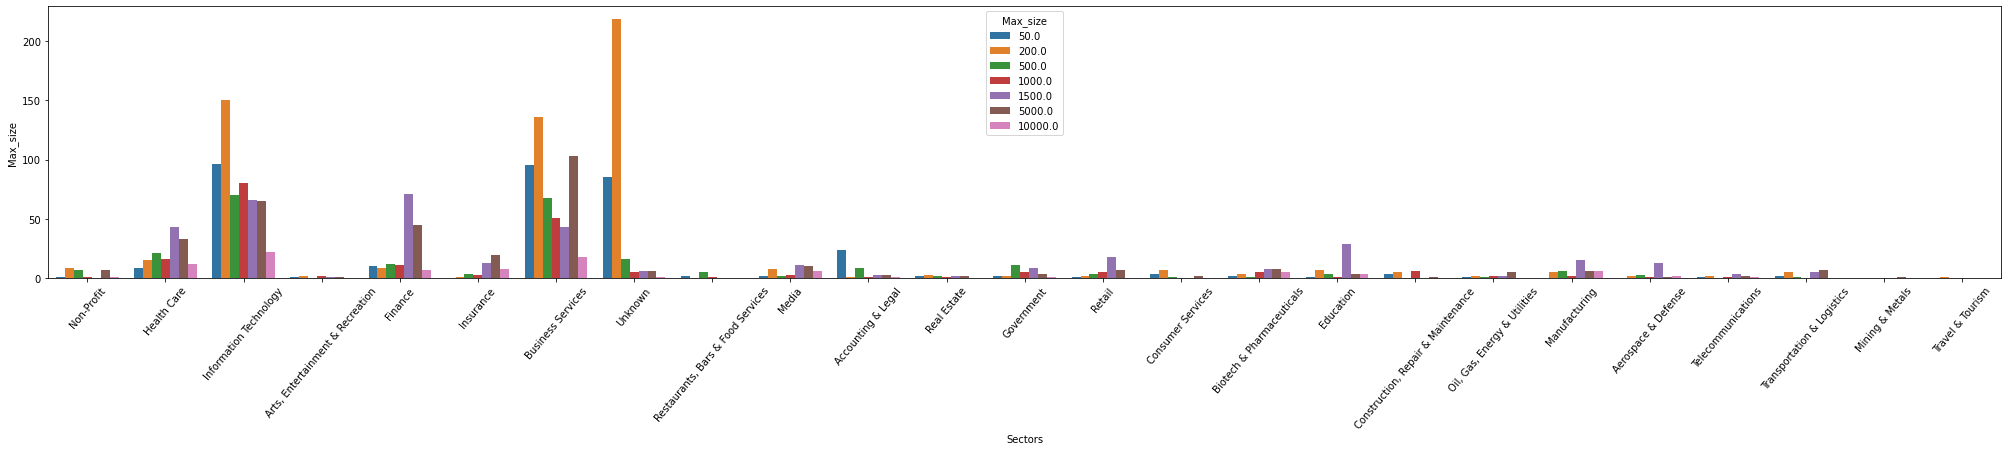

In [39]:
fig,ax=plt.subplots(figsize=(35,5))
sns.countplot(df['Sector'],hue=df['Max_size'],ax=ax)
plt.xlabel('Sectors')
plt.ylabel('Max_size')
plt.xticks(rotation=50)
plt.show()

**We distributed the sectors by the max size of the companies,As you see, The Unknown has the highest portion and the min size for Unknown sector is over 200(an orange one) 
After this, the Business services  has the highest amount(the max size is 51 and the amount of it is 150 records)**


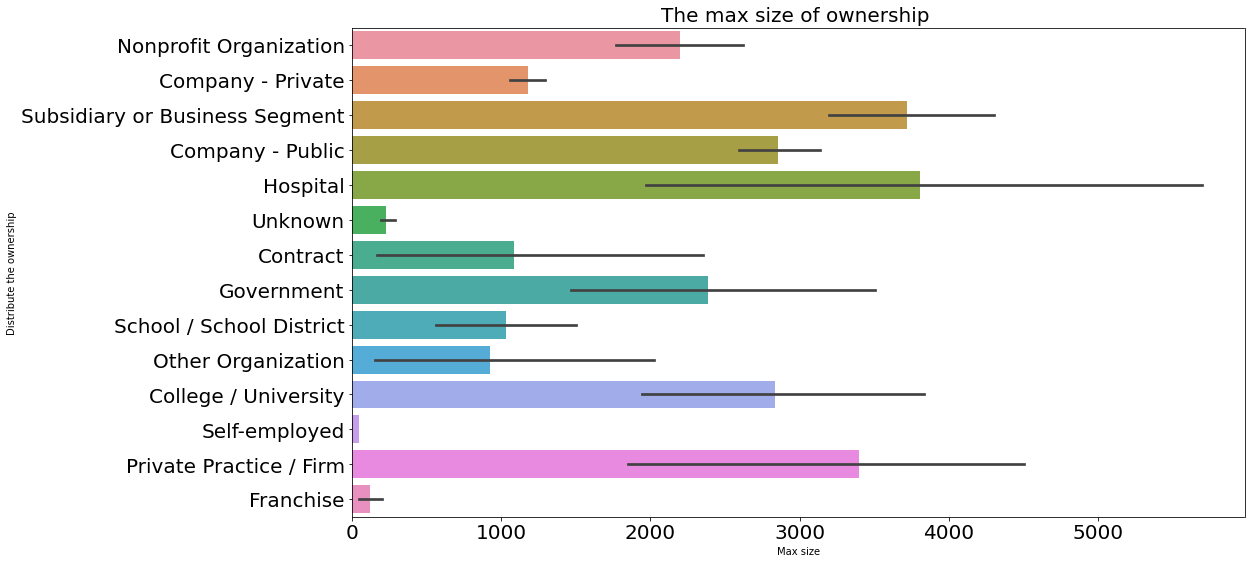

In [40]:
plt.figure(figsize=(16,9))
sns.set_palette(sns.color_palette("Paired"))
ax = sns.barplot(x='Max_size', y='ownership\t', data=df, orient='h')
ax.axes.set_title("The max size of ownership ",fontsize=20)
ax.set_xlabel("Max size")
ax.set_ylabel("Distribute the ownership")
sns.color_palette("Set2")
ax.tick_params(labelsize=20)

**This figure shows that the Hospital has the highest amount of the max size(alomost 3500),then Business segment is the seecond with almost 3400 numbers and lowest is self employed which has the lowest max size of the compamy with less than 10.**

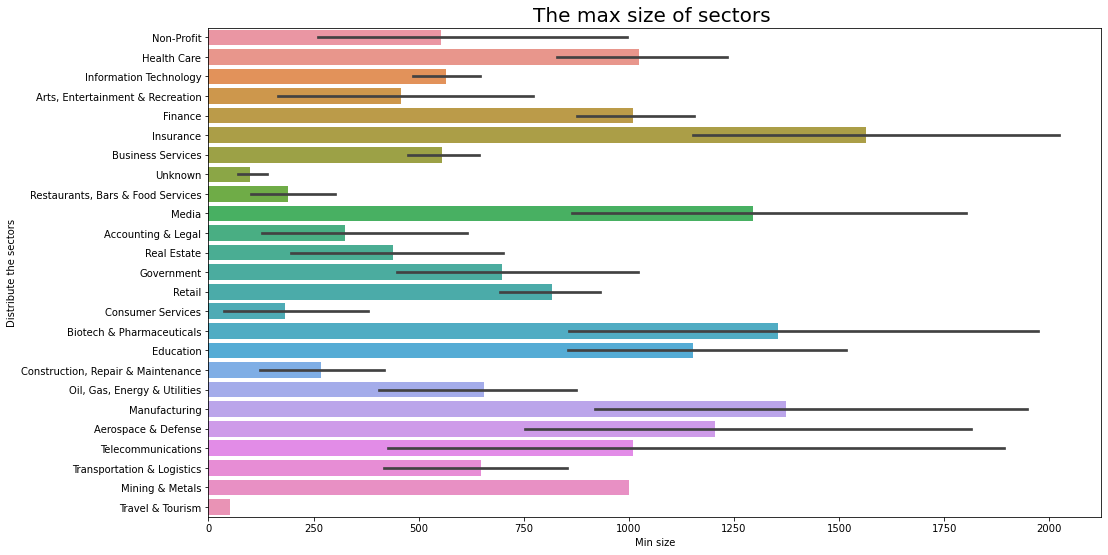

In [41]:
plt.figure(figsize=(16,9))
sns.set_palette(sns.color_palette("Paired"))
ax = sns.barplot(x='Min_size', y='Sector', data=df, orient='h')
ax.axes.set_title("The max size of sectors ",fontsize=20)
ax.set_xlabel("Min size")
ax.set_ylabel("Distribute the sectors")
sns.color_palette("Set2")
ax.tick_params(labelsize=10)

**On the top, we find out the max size for each industry part.As you see, inssurance has the highest amount of the min size and afer this, manufacturing and Biotechnology is the secod and third for the highest amount of minimunm od the size and the lowest min size is for trave and tourism.**

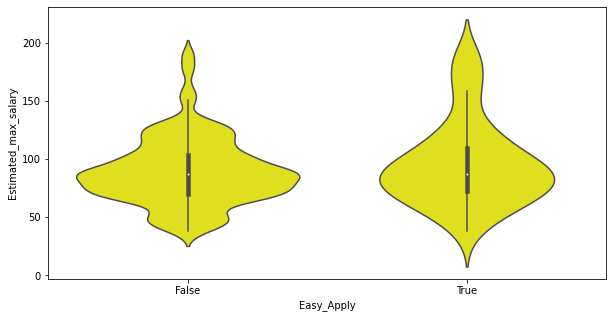

<Figure size 720x360 with 0 Axes>

In [42]:
sns.violinplot(x='Easy_Apply',y='Estimated_max_salary',data=df, color='yellow')
plt.figure('Find out the easy apply with the estimated max salary ')
plt.show()

**As you see,for easy apply we have 2 options, true or false and it shows that for non easy apply the estimated max salary is between 55k to 110k but easy apply is over 130k.**

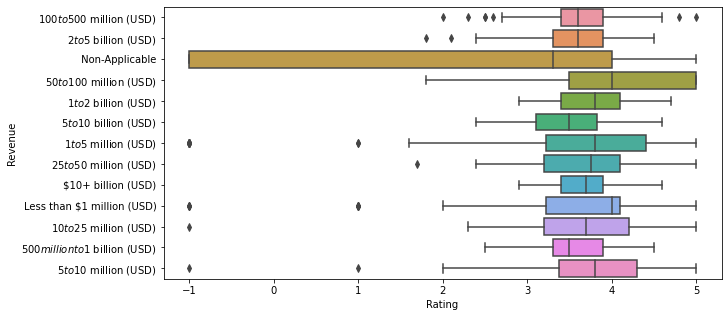

In [43]:
sns.boxplot(x='Rating',y='Revenue',data=df)
plt.title=('compare the ratings with the annual revenue of the companies')
plt.show()

* We use the boxplot for from which rating to we get the most revenue for companies and it shows that from rating -1 to almost 4 non_aalicable has the highest portion.
* After this, from rating 3.5 to 5, the revenue is almost between 50 to 100 million $.

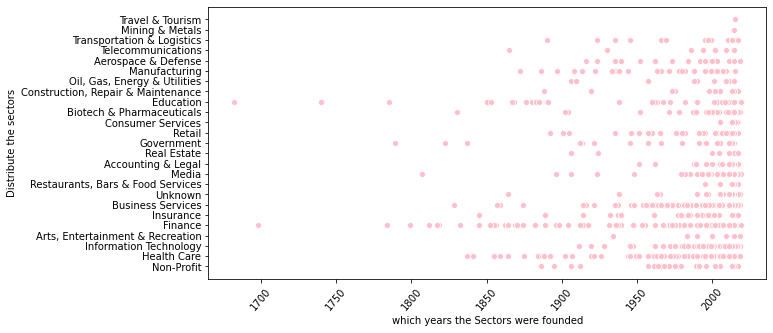

In [44]:
sns.scatterplot(x='Founded\t',y='Sector',data=df,color='pink')
plt.xlabel('which years the Sectors were founded')
plt.ylabel('Distribute the sectors')
plt.xticks(rotation=50)
plt.show()

> We distribute the sectors with their years which founded and as you see, most of the sectors were founded between 1950 to 2018 and only Finance(1700) and education(before 1700) were founded.

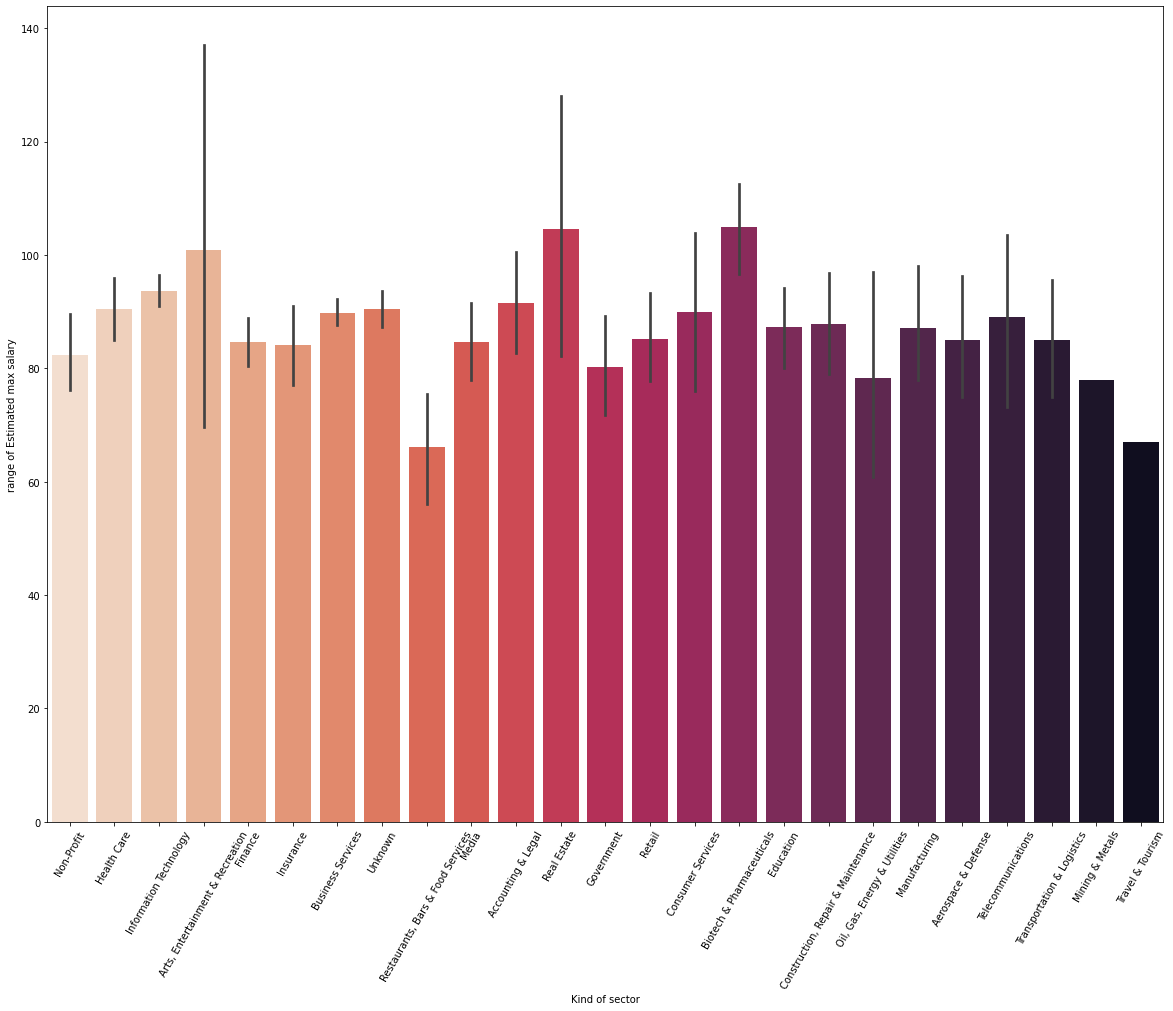

In [45]:
df.sort_values(by='Estimated_max_salary',ascending=False)


plt.figure(figsize=(20,15))
sns.barplot(x='Sector',y='Estimated_max_salary',data=df,palette="rocket_r")
plt.xlabel('Kind of sector')
plt.ylabel('range of Estimated max salary')
plt.xticks(rotation=60)
plt.show()

*This graph shows that the Estimated max salary with tall sectors.This graph shows that the sectors like Entertainment and art,Real state and Biotech has the higehst estimated max salary which is about 100000 Dollor and Restaurants and bars has the highest max salary which is about 65000 Dollor.*

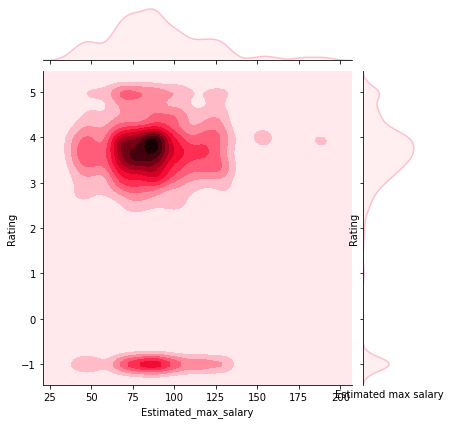

<Figure size 720x432 with 0 Axes>

In [46]:
sns.jointplot(x='Estimated_max_salary',y='Rating',data=df, color='pink',kind='kde')
plt.xlabel('Estimated max salary')
plt.ylabel('Rating')
plt.xticks(rotation=50)
plt.figure(figsize=(10,6))
plt.show()

*On the top, we want to find put the distribuation of the rating with estimated max salary and as you see, the salary between 75 to 100 has the highest rating between 3.5 to 4.5*

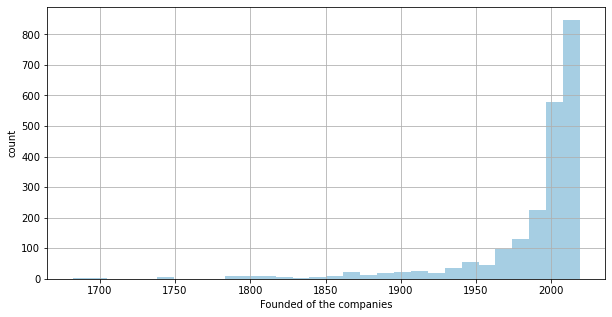

In [47]:
# It shows that most of the companies and sectors and industries were founded betweem years 1980 to 2019
df['Founded\t'].hist(bins=30)
plt.xlabel('Founded of the companies')
plt.ylabel('count')
plt.show()

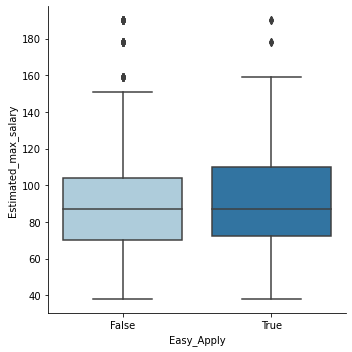

<Figure size 720x432 with 0 Axes>

In [48]:
sns.catplot(x='Easy_Apply',y='Estimated_max_salary',data=df,kind='box')
plt.figure(figsize=(10,6))
plt.show()

*We use catplot and we compare the Easy apply and estimated max salary.As you see, we have true and false for easy apply and the estimated max salary for easy apply is from 80 to 110 and it is more than non easy apply* 

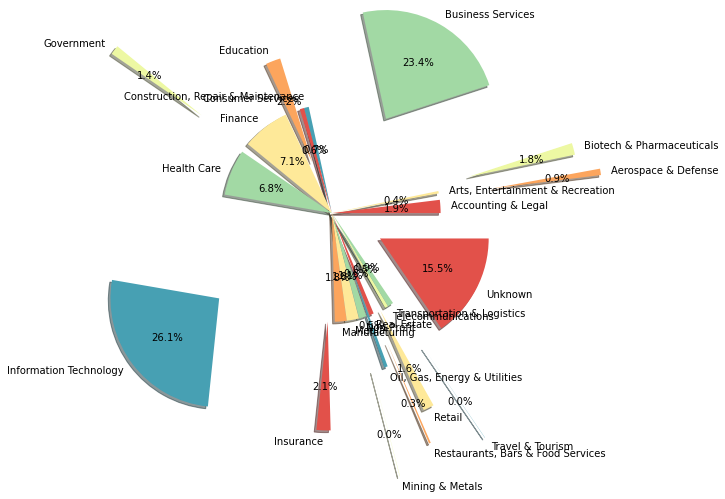

In [49]:
pm = df[['Estimated_max_salary', 'Sector']].groupby(['Sector']).agg([sum])

sns.set_palette('Spectral')
plt.figure(figsize=(10,5))
plt.pie(pm['Estimated_max_salary']['sum'], labels = pm.index, explode = (0, 1.5, 0, 1.3, 1, 0, 0, 0.5, 0, 1.5, 0, 1.3, 1, 0, 0,1.5, 0, 0.5, 0, 1.3, 1, 0, 0, 1.5,0.5 ), 
        shadow = True, autopct = '%1.1f%%')
plt.show()

*On the top, we we distribute the sectors with percent of the portion for each of them and it shows that the highest one is IT sector which has 26.1% and then Business service has 23.4%*

In [50]:
df.sample(5)

,Job,Estimated_min_salary,Estimated_max_salary,Location,Headquarters,Rating,Founded\t,ownership\t,Min_size,Max_size,Industry,Sector,Revenue,Competitors\t,Easy_Apply
1849,Mid Data Analyst,57,104,"San Francisco, CA","San Francisco, CA",4.8,2014,Company - Private,1.0,50.0,Advertising & Marketing,Business Services,$10 to $25 million (USD),Unknown,False
359,Data Analyst,77,132,"Jersey City, NJ","Tokyo, Japan",3.4,1996,Company - Public,1100.0,1500.0,Investment Banking & Asset Management,Finance,$10+ billion (USD),"Bank Of Tokyo-Mitsubishi UFJ, Mizuho Financial...",False
1617,Lead Geophysical Data Analyst,42,76,"Austin, TX","Nicosia, Cyprus",3.8,1998,Company - Private,1001.0,5000.0,Video Games,Media,Non-Applicable,Unknown,True
307,Data Analyst,42,74,"New York, NY","Northville, MI",4.0,2004,Company - Private,501.0,1000.0,IT Services,Information Technology,$50 to $100 million (USD),Unknown,False
68,Data Analyst,51,88,"New York, NY","South Plainfield, NJ",3.7,1999,Company - Private,51.0,200.0,Staffing & Outsourcing,Business Services,$50 to $100 million (USD),"Artech Information Systems, Mindlance, Tech Ma...",False


In [51]:
# preprocessing
from  sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#classifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Performance metrics 
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [52]:
df.drop(columns=['ownership\t','Founded\t','Competitors\t'],inplace=True)
df.head(4)

,Job,Estimated_min_salary,Estimated_max_salary,Location,Headquarters,Rating,Min_size,Max_size,Industry,Sector,Revenue,Easy_Apply
0,Data Analyst,37,66,"New York, NY","New York, NY",3.2,201.0,500.0,Social Assistance,Non-Profit,$100 to $500 million (USD),True
1,Quality Data Analyst,37,66,"New York, NY","New York, NY",3.8,1100.0,1500.0,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),False
2,Sr Data Analyst,37,66,"New York, NY","New York, NY",3.4,1001.0,5000.0,Internet,Information Technology,Non-Applicable,False
3,Data Analyst,37,66,"New York, NY","McLean, VA",4.1,201.0,500.0,IT Services,Information Technology,$50 to $100 million (USD),False


In [53]:
le=preprocessing.LabelEncoder()
df.Job=le.fit_transform(df.Job)
df.Location=le.fit_transform(df.Location)
df.Headquarters=le.fit_transform(df.Headquarters)
df.Industry=le.fit_transform(df.Industry)
df.Sector=le.fit_transform(df.Sector)
df.Revenue=le.fit_transform(df.Revenue)
df.Revenue=le.fit_transform(df.Revenue)
df.Easy_Apply=le.fit_transform(df.Easy_Apply)
df.sample(5)

,Job,Estimated_min_salary,Estimated_max_salary,Location,Headquarters,Rating,Min_size,Max_size,Industry,Sector,Revenue,Easy_Apply
1041,67,41,78,22,43,2.3,1001.0,5000.0,8,3,5,0
1181,26,37,68,196,370,3.4,201.0,500.0,6,8,1,0
149,74,43,76,154,291,3.6,51.0,200.0,42,10,0,0
77,15,51,88,154,86,4.0,1.0,50.0,74,4,2,0
1748,55,50,86,44,84,3.8,1001.0,5000.0,50,12,0,0


In [54]:
x=df.drop(['Estimated_min_salary','Estimated_max_salary','Rating','Min_size','Max_size','Easy_Apply'],axis=1)
y=df['Easy_Apply'].values

In [55]:
x.head(5)

,Job,Location,Headquarters,Industry,Sector,Revenue
0,15,154,291,71,16,5
1,57,154,291,42,10,6
2,67,154,291,51,11,0
3,15,154,248,47,11,10
4,59,154,291,73,2,5


In [56]:
# k-NN classifier

# Split into training and test set
x_train , x_test , y_train , y_test=train_test_split(x , y , test_size=0.3 , random_state=1234, stratify= y )

# Create a k-NN classifier with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(x_train, y_train)

# Print the accuracy
print(knn.score(x_test, y_test))

0.9574468085106383


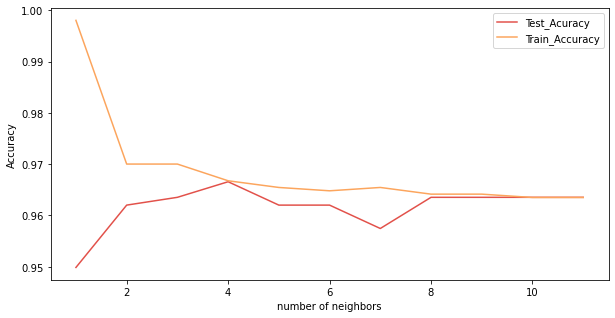

In [57]:
# we want to know the performance of the KNeighbors for testing and training result

neighbors = np.arange(1, 12)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # Train and test the model
    knn = KNeighborsClassifier(n_neighbors=k)

    # train the model
    knn.fit(x_train, y_train)
         
    # compute the accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
        
    # compute the test
    test_accuracy[i]=knn.score(x_test, y_test)
    
    
    # result
plt.plot(neighbors , test_accuracy , label='Test_Acuracy')
plt.plot(neighbors, train_accuracy , label='Train_Accuracy')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.show()
# You can see the differences the number of the neighbors and also train and test of the KNeighbors and amount of the acuracy

In [58]:
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(1534, 6) (1534,) (658, 6) (658,)


In [59]:
models=[]
models.append(('LR',LogisticRegression(random_state=12345)))
models.append(('NN',MLPClassifier(random_state=12345)))
models.append(('RF',RandomForestClassifier(random_state=12345)))
models.append(('DT',DecisionTreeClassifier(random_state=12345)))
models.append(('svm',SVC(random_state=12345)))
models.append(('KN', KNeighborsClassifier()))

result=[]
name=[]

# We want to find out what is the classification report and confusion matrix and when we use it:

* Percision: measure the model performance on measuring the count of true positives in correct manner out of all positive predictions made.

* Recall score :is used to measure the model performance in terms of measuring the count of true positives in correct manner out of all the actual positive values.

* F1-score :is harmonic mean of precision and recall score and is used as a metrics in the scenarios where choosing either of precision or recall score can result in compromise in terms of model giving high false positives and false negatives respectively.

* Macro average gives each prediction similar weight while calculating loss but there might be case when your data might be imbalanced and you want to give importance to some prediction more (based on their proportion), there you use 'weighted' averag

In [60]:
# As you see, these are the result of making model( Random Forest has the highest percent among another )
for name, model in models:
    model.fit(x_train,y_train)
    predictions=model.predict(x_test)
    accuracy=accuracy_score(y_test, predictions)
    msg = "%s: (%f)" % (name, accuracy)
    print(msg)
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))

LR: (0.963526)
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       634
           1       0.00      0.00      0.00        24

    accuracy                           0.96       658
   macro avg       0.48      0.50      0.49       658
weighted avg       0.93      0.96      0.95       658

[[634   0]
 [ 24   0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NN: (0.963526)
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       634
           1       0.00      0.00      0.00        24

    accuracy                           0.96       658
   macro avg       0.48      0.50      0.49       658
weighted avg       0.93      0.96      0.95       658

[[634   0]
 [ 24   0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RF: (0.965046)
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       634
           1       0.67      0.08      0.15        24

    accuracy                           0.97       658
   macro avg       0.82      0.54      0.57       658
weighted avg       0.96      0.97      0.95       658

[[633   1]
 [ 22   2]]
DT: (0.925532)
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       634
           1       0.07      0.08      0.08        24

    accuracy                           0.93       658
   macro avg       0.52      0.52      0.52       658
weighted avg       0.93      0.93      0.93       658

[[607  27]
 [ 22   2]]
svm: (0.963526)
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       634
           1       0.00      0.00      0.00        24

    accuracy                           0.96       658
   macro avg       0.48      0.50   

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
